<img src="scikit.png" align="center">

<h2 align="center">Simple Linear Regression</h2>

- Introduction
- Data Set
- Loading the Data and Importing Libraries
- Gathering Data
- Exploratory Data Analysis
- Creating Simple Linear Regression
- Multiple Linear Regression Model

## <font color='brown'>Introduction</font>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

- $sales: $ predictor or feature
- $\beta_0: $ slope coefficient
- $\beta_1, \beta_2, \beta_3: $ intercept terms
- TV, radio, newspaper: response or target variables

## <font color='brown'>Data Set</font>

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html)

## <font color='brown'>Loading the Data and Importing Libraries</font>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
!pip install yellowbrick 
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
print("libraries imported..")

## <font color='brown'>Software Needed</font>

Software: Python and Jupyter Notebook

The following packages (libraries) need to be installed:

1. pandas
2. NumPy
3. scikit Learn
4. Yellow Brick


## <font color='brown'>**Gathering Data**</font>

In [8]:
df = pd.read_csv("data/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df.shape

(200, 5)

We can see that ther are no missing value.

In [16]:
#finding null value
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [17]:
#Let's find duplicate data set
df.duplicated().sum()

0

In [18]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [20]:
#lets drop Unnamed:0 Column from   data frame using index base method
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## <font color='brown'>**Exploratory Data Analysis**</font>


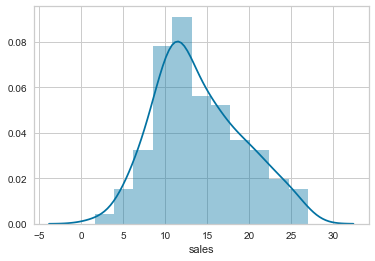

In [42]:

sns.distplot(df.sales)

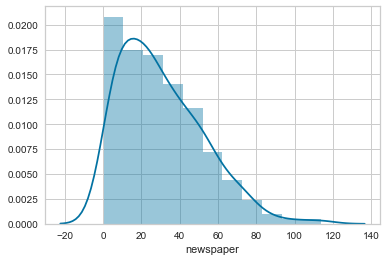

In [23]:
sns.distplot(df.newspaper)

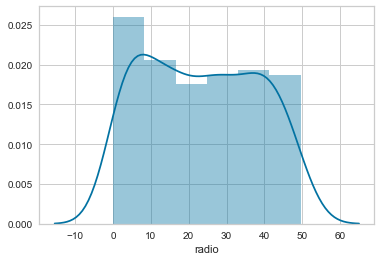

In [24]:
sns.distplot(df.radio)

### <font color='green'>**Exploring Relationships between Predictors and Response**</font>


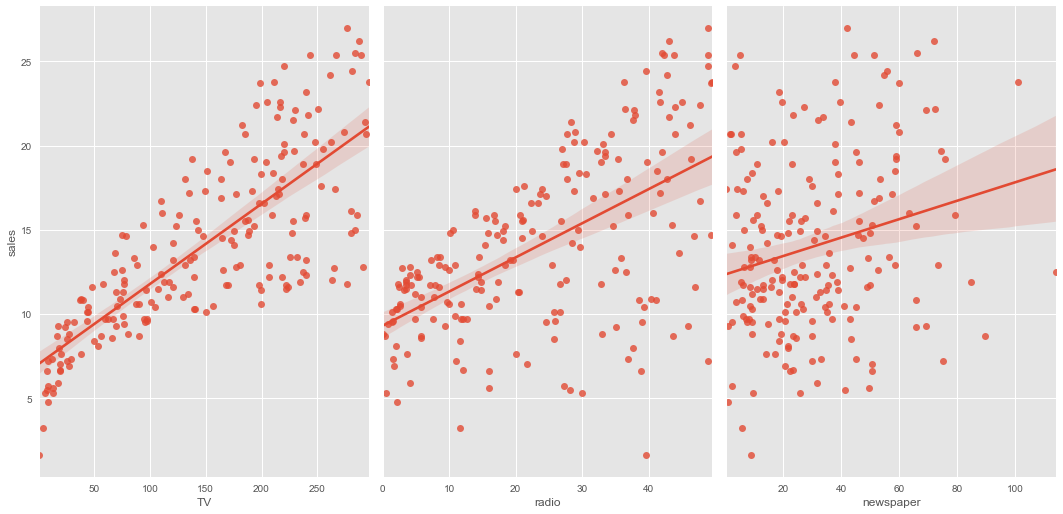

In [52]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, 
            aspect =0.7, kind='reg')

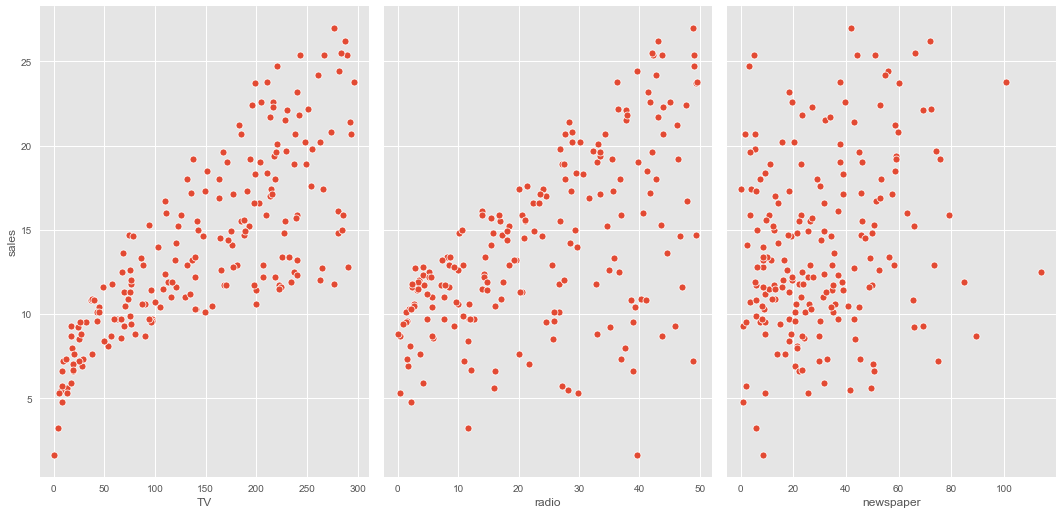

In [48]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

In [26]:
df.TV.corr(df.sales)

0.7822244248616061

In [27]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


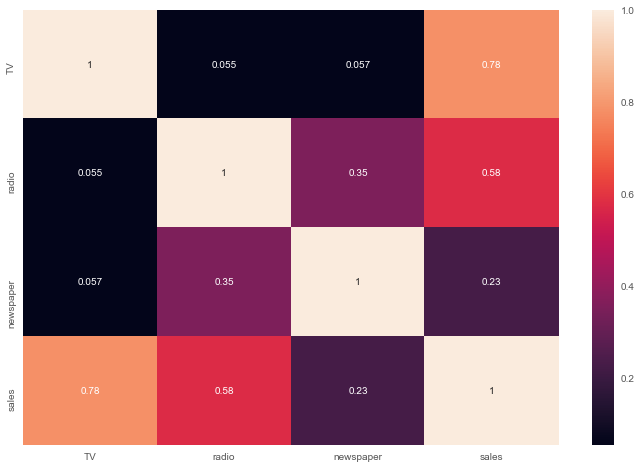

In [51]:
sns.heatmap(df.corr(),annot=True)

Tv is hihgly corr with sales

## <font color='brown'>**Creating the Simple Linear Regression Model**</font>


In [29]:
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [30]:
y = df.sales
type(y)

pandas.core.series.Series

Since its panad series we can use scitkit function


In [32]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [35]:
lm0 = LinearRegression()
lm0.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### <font color='blue'>Interpreting Model Coefficients</font>


In [37]:
print(lm0.intercept_)
print(lm0.coef_)

6.91197261886872
[0.04802945]


B0 = 6.91, B1 = 0.48 coef associate with spending on tv ads. For given amount of radio and news paper ads spending a unit increased in Tv ads spending is associated with a 0.048 unit increased in the sales revune. for a given amount of radio and newspaper ads spending an additional 1000 USD spend on TV ads is associated with an increase in sales of 48 items.

This is the statement associate with corr not causation.If increase in tv ads spending was associated with decreasing in sales then B1 i.e coef would be negative.

### <font color='blue'>Making Predictions with our Model</font>


In [50]:
#making prediction on test set
y_pred = lm0.predict(X_test) #this is going to make pred on 25% of test set data
y_pred[:5] #since it is numpy array we use this method

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

This are first 5 values of the predicted sales reveune on test set.

Now we need to compare our predicted value with actual value, hence evaluation metrics comes into play.

## <font color='brown'>**Multiple Linear Regression Model**</font>


In [53]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

# instantiate and fit
lm1 = LinearRegression() #model 1m1 refer to first model
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


for given amount of Tv and news paper ads spending an additional 
usd 1000 on Tv ads, radio ads leads to an increase in sales by apporx 46 and 189 units respectively.coef of news paper was significanlty non zero or close to zero.

In [54]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820462),
 ('newspaper', -0.0010374930424762972)]

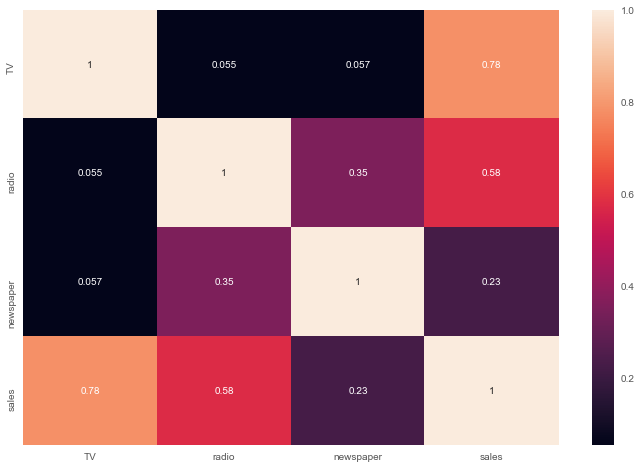

In [55]:
sns.heatmap(df.corr(), annot=True)

we can see that more is spend on newspaper compared to radio, but news paper ads has no direct impact on sales. The market where more money is spend on radio ads leads to more sale compared to newspaper.

### <font color='blue'> Feature Selection</font>


How well does the model fit the data? what response value should predict and how accurate is our prediction?
Which predictor are associated with response inorder to git a single model ivolving all those predictor this process is known as feautre selection or varaible selection.

In [57]:
lm2 = LinearRegression().fit(X[['TV', 'radio']], y) #lm2 second model with Tv, Radio only
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828956


In [59]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y) #lm3 third model with newspaper 
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789522


we can see here that model that uses all three advs media to predice sales 
and that those use only two Tv and Radio has similar R square value meaning newspaper does not have impact on our data so we can drop this newspaper column.

### <font color='blue'>Model Evaluation Using Train/Test Split and Metrics</font>


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:
RMSE calcauset diff btn acutal value and predicated value of the response variable. The lesser the value of RMSE the better is the model

In [63]:
X = df[['TV', 'radio', 'newspaper']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression() #l4 indicates fourth model
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.4046514230328955
R^2:  0.9156213613792232


In [64]:
X = df[['TV', 'radio']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression() #lm5 fifth model without newspaper
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 1.3879034699382888
R^2:  0.9176214942248908


we can see when we omitted newspaper oyr RMSE decread and our R square increased so this is better model for us.

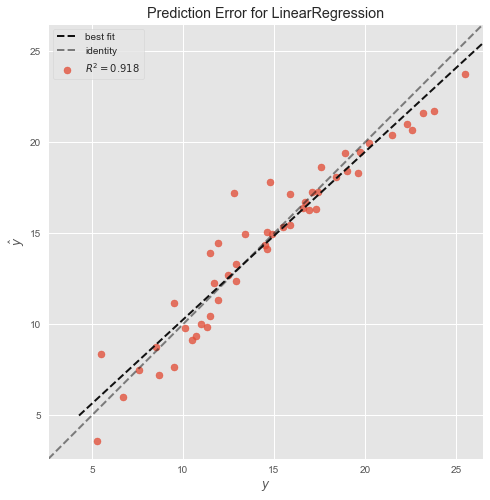

In [66]:
#Data visualization and model diagnostic library called yellow brick
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

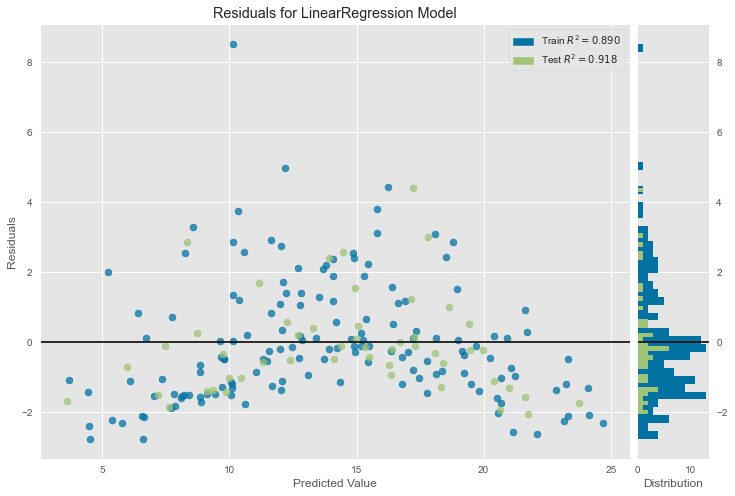

In [67]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

here we can see pred erorr plot for mult lin reg model and we can see here our line of identity and line of best fit. although our R square is high there are still some unexpaleind varaiblity in our data , model is unable to caputre and this is due to interaction effect or better known as Synergy.

### <font color='blue'>Interaction Effect (Synergy)</font>


one way of extending this model to allow for interaction effect is to include third predictor lets call it interaction term whihc is constructed by computing the product of x1,x2, and so on that is mult of value corresponding to Tv and radio column.

In [70]:
df['interaction'] = df['TV'] * df['radio']

In [71]:
X = df[['TV', 'radio', 'interaction']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression() #our 6th model
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 0.7011871137164326
R^2:  0.9789736814681261


r square is 97% and dramtic decrease of RMSE which is very good sing for us.

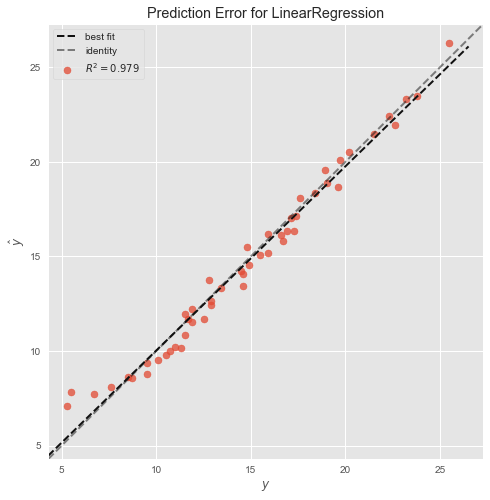

In [72]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

here we can see that this model interation term fitted nicely with our data plot. It explain that about 97% of the variablity in the data.So we can conclude that lm6 this model is best model than other model above.